#### Importing the necessary libraries

In [1]:
import os
import cv2
import time
import matplotlib.pyplot as plt

#### Creating Haar cascade classifier object

In [2]:
plate_cascade =cv2.CascadeClassifier(r'C:\Users\Gunjan\Anaconda1\envs\Real-time-License-plate-detection-and-blurring.-master\india_license_plate.xml') # Loads the data required for detecting the license plates from cascade classifier.
# add the path to 'india_license_plate.xml' file.

#### This function is core part of the code

In [3]:
def detect_plate(img): # the function detects and perfors blurring on the number plate.
    plate_img = img.copy()
    roi = img.copy()
    cropped_plate=img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.3, minNeighbors = 7) # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    for (x,y,w,h) in plate_rect:
        
        roi_ = roi[y:y+h, x:x+w, :] # extracting the Region of Interest of license plate for blurring.
        blurred_roi = cv2.blur(roi_, ksize=(16,16)) # performing blur operation on the ROI
        plate_img[y:y+h, x:x+w, :] = roi_ # replacing the original license plate with the blurred one.

        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (51,51,255), 3) # finally representing the detected contours by drawing rectangles around the edges.
        cropped_plate=roi_
        plt.imshow(plate_img)
    return cropped_plate # returning the processed image.

#### Run this part to take input directly from camera

In [9]:
#####################- Run this part to take input directly from camera -#####################

# cam = cv2.VideoCapture(0)

# while True:
#     ret, frame = cam.read(0) # reading the input frame by frame.
#     fr = detect_plate(frame) # sends each frame to the function for processing.
#     cv2.imshow('video', fr) # displaying the output image.
#     if(cv2.waitKey(1) & 0xFF == 27): # press 'Esc' key to exit anytime.
#         break

#### Run this part to take input from a video file

In [10]:
#####################- Run this part to take input from a video file -#####################

cam = cv2.VideoCapture('demo2.mp4') # reading the video file.

while cam.isOpened():
    ret, frame = cam.read() # reading the file frame by frame.
    if ret == True:
        time.sleep(1/20) # change the sleep time to increase the fps of output video.
        fr = detect_plate(frame) # sends each frame to the function for processing.
        cv2.imshow('video', fr) # displaying the output image.
        if(cv2.waitKey(1) & 0xFF == 27): # press 'Esc' key to exit anytime.
            break
    else:
        break

#### Displaying the input image

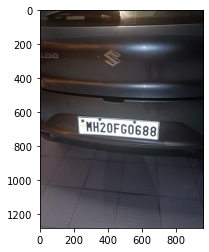

In [7]:
img = cv2.imread('car_plate7.jpg')
plt.imshow(img)

#### Processing the image for detecting license plate and blurring it.

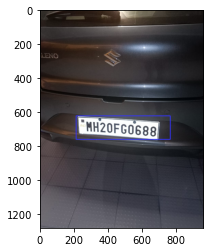

In [46]:
output_img = detect_plate(img) 

In [47]:
#path = r'C:\Users\Gunjan\Desktop\Custom_haar_cascade\p'
#images = []
#for filename in os.listdir(path):
#    img = cv2.imread(os.path.join(path,filename))
#    if img is not None:
#        images.append(img)
#for image in images:
#    output_image = detect_plate(image)

#### Displaying the result

True

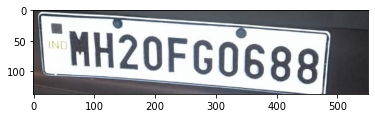

In [48]:
plt.imshow(output_img)
cv2.imwrite('output.jpg',output_img)

#### Closing the windows after the program is complete

In [27]:
cam.release()
cv2.destroyAllWindows()